                                    Report on student performance in Exams

In [20]:
#Step 1: Loading necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
#data reading of csv file
df=pd.read_csv("student_data.csv")

In [22]:
#print first 10 rows to understand the data.
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#**Explanation of Data**: This data is about performance of students in math, reading, and writing. It is based on gender , race, parental level of education, lunch and whether students were prepared before exams or not?
The EDA of this tell will help to understand the influence of various factors like economic, personal and social on the students performance.

#Hypothesis on this data..
1.Students whose's parents are highly-qualified performs good in exams
2. Female students are more hardworking, so they perform well in exam.
3. Students poor in math have poor result in reading and writing as well.

In [23]:
##Understanding of Data

#shape of data 
print(df.shape)

(1000, 8)


In [24]:
df.columns   ##all columns name

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [25]:
df.dtypes   ##Checking datatype is correct or incorrect

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [26]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Step 2: Data Cleaning

In [27]:
##Checking null values:
null_values=df.isnull().sum().sort_values(ascending=False)
per_null=(null_values/df.shape[0])*100
print(per_null)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [28]:
#checking duplicate values
df.duplicated().sum()

0

#Working on 1st Hypothesis: The students of highly qualified parents perform well in all subjects.

In [29]:
#defining a variable passing_marks to compare the result
passing_marks=40

#defining a new variable Math_pass and using function to determine math result.
df['Math_Pass'] = np.where(df['math score']<passing_marks, 'F', 'P')
df.Math_Pass.value_counts()

Math_Pass
P    960
F     40
Name: count, dtype: int64

In [30]:
# pass and fail students in reading exam
df['Reading_Pass'] = np.where(df['reading score']<passing_marks, 'F', 'P')
df.Reading_Pass.value_counts()

Reading_Pass
P    974
F     26
Name: count, dtype: int64

In [31]:
# pas and fail in writing exam.
df['Writing_Pass'] = np.where(df['writing score']<passing_marks, 'F', 'P')
df.Writing_Pass.value_counts()

Writing_Pass
P    968
F     32
Name: count, dtype: int64

In [32]:
#Students passed in all subjects
df['OverAll_Pass'] = df.apply(lambda x : 'F' if x['Math_Pass'] == 'F' or 
                                    x['Reading_Pass'] == 'F' or x['Writing_Pass'] == 'F' else 'P', axis =1)

df.OverAll_Pass.value_counts()

OverAll_Pass
P    949
F     51
Name: count, dtype: int64

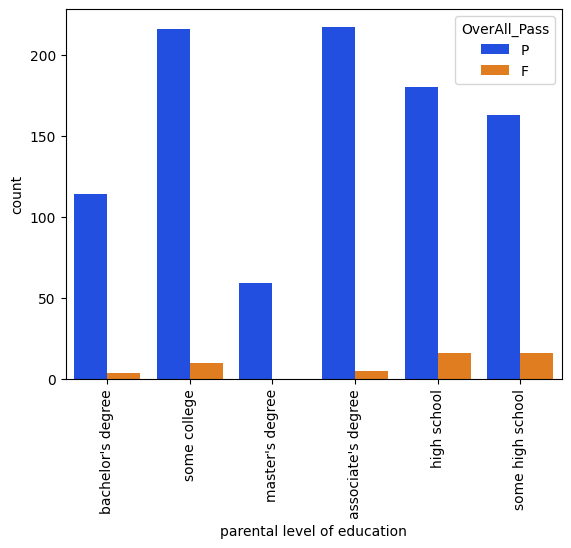

In [33]:
#Comparison of passing students with education of parents

p = sns.countplot(x='parental level of education', data = df, hue='OverAll_Pass', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)  #Show name vertically to avoid merged name in x-axis

The above graph clearly depicts that students having highly qualified parents, passed their exams, where students whose parents have low qualification could not perform well in the class. This infer that background, educational environment matters in students's performance.

**Hypothesis 2: Female students are more hardworking, so they perform well in exam.**

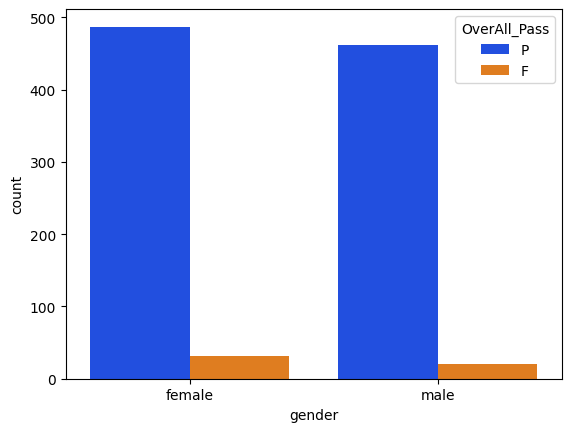

In [34]:
#Graphical visualization of hypothesis

p1 = sns.countplot(x='gender', data = df, hue='OverAll_Pass', palette='bright')

**Result**: The above bar chart shows that more females passed the exams, however female failures are also greater in number.
Good performance has nothing to do with gender.

Hypothesis 3: Students poor in math have poor result in reading and writing as well.

In [35]:
#loading libraries 
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from bokeh.palettes import Spectral3

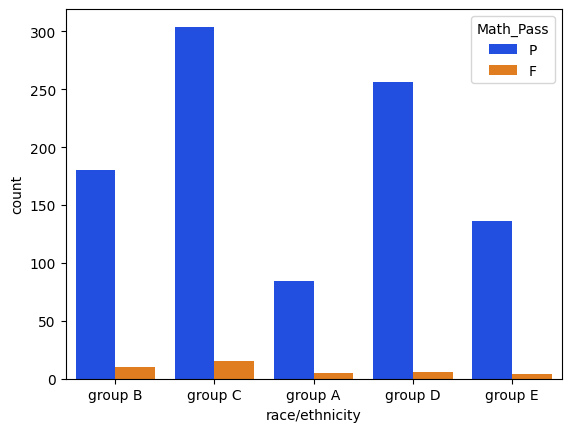

In [36]:
p = sns.countplot(x='race/ethnicity', data = df, hue='Math_Pass', palette='bright')






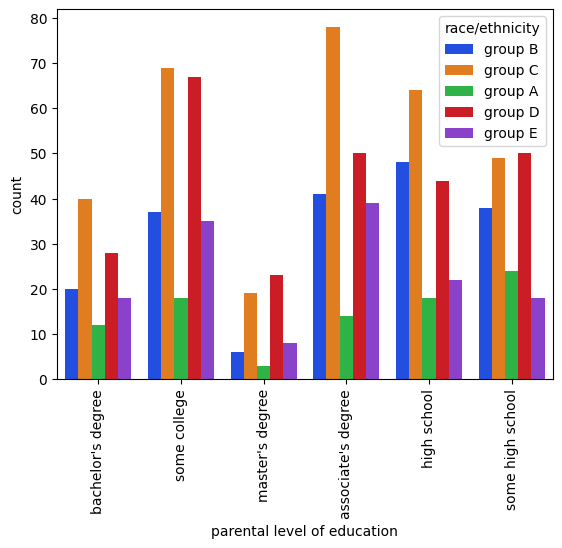

In [39]:
#Visualization
p = sns.countplot(x='parental level of education', data = df , hue='race/ethnicity', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 